## Bibliotecas a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Enlaces

In [2]:
enlace_PAT = './clean_data/PAT.csv'
enlace_ART = './clean_data/ART.csv'
enlace_TRANSPORTE = './clean_data/TRANSPORTE.csv'
enlace_VIDA = './clean_data/VIDA.csv'
enlace_RETIRO = './clean_data/RETIRO.csv'

In [3]:
0 a 25 | 25 a 70 | 70 a 200

SyntaxError: invalid syntax (<ipython-input-3-d256a340e844>, line 1)

# % Mercado vs Superávit  -  Scatter Plot 

In [65]:
def mercVsCapacidad(df, nombre='Test'):
    
    count = len(df.Fecha.unique())


    # ============================ Iterando por fechas ===============================
    for i in df.Fecha.unique():
        tmp = df[df.Fecha == i]
    
    
    # ============================== Tamaño dinámico ================================
        if len(tmp) <= 25:
            fig = plt.figure(figsize=(900/96,600/96),dpi=96)
        elif len(tmp) <= 70:
            fig = plt.figure(figsize=(900/96,900/96),dpi=96)
        else:
            fig = plt.figure(figsize=(900/96,1400/96),dpi=96)

        
        
    # ========================= Agregando celda % de Mercado =========================
        p_mercado = tmp['%\nProducción\nTotal'].sum()
        tmp['% Mercado'] = round(tmp['%\nProducción\nTotal']*100/p_mercado,2)
       
        
    # ============================== Realizando el plott =============================
        sns.set_style('darkgrid')
        ax = sns.scatterplot(x = '%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]',
                             y = 'Denominación',
                             size = '% Mercado',
                             sizes = (100,700),
                             hue = '% Mercado',
                             data = tmp,
                             palette = 'viridis',
                            )
        
        
    # ================================ Forma del plott ===============================
        plt.suptitle('RELACIÓN % DE MERCADO VS CAPACIDAD DE RESPUESTA', 
                     fontsize=18, fontweight='bold', y = 1)
        plt.ylabel('{}'.format(i), 
                   fontsize=16,fontweight='bold')
        plt.xlabel('% de capacidad de respuesta', 
                   fontsize=16,fontweight='bold')
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
                   loc='lower left', ncol=5, 
                   mode="expand", borderaxespad=0., )
        plt.tick_params(axis='y', labelsize = 7, labelbottom = True ) # labelrotation=45, length=25, pad = 25,length=15, grid_linewidth = 3
        plt.xlim(0,800)
        plt.ylim()
        plt.margins(y=0.01)
        
                    
        
    # ============================== Guardando el plott =============================
        nombre_archivo = './plots/MercVsCap_'+nombre+str(count).zfill(4)+'.jpg'       
        plt.savefig(nombre_archivo, dpi=96,bbox_inches='tight')                      
        plt.gca()
        
        count -= 1
        return

/home/ramirogallo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


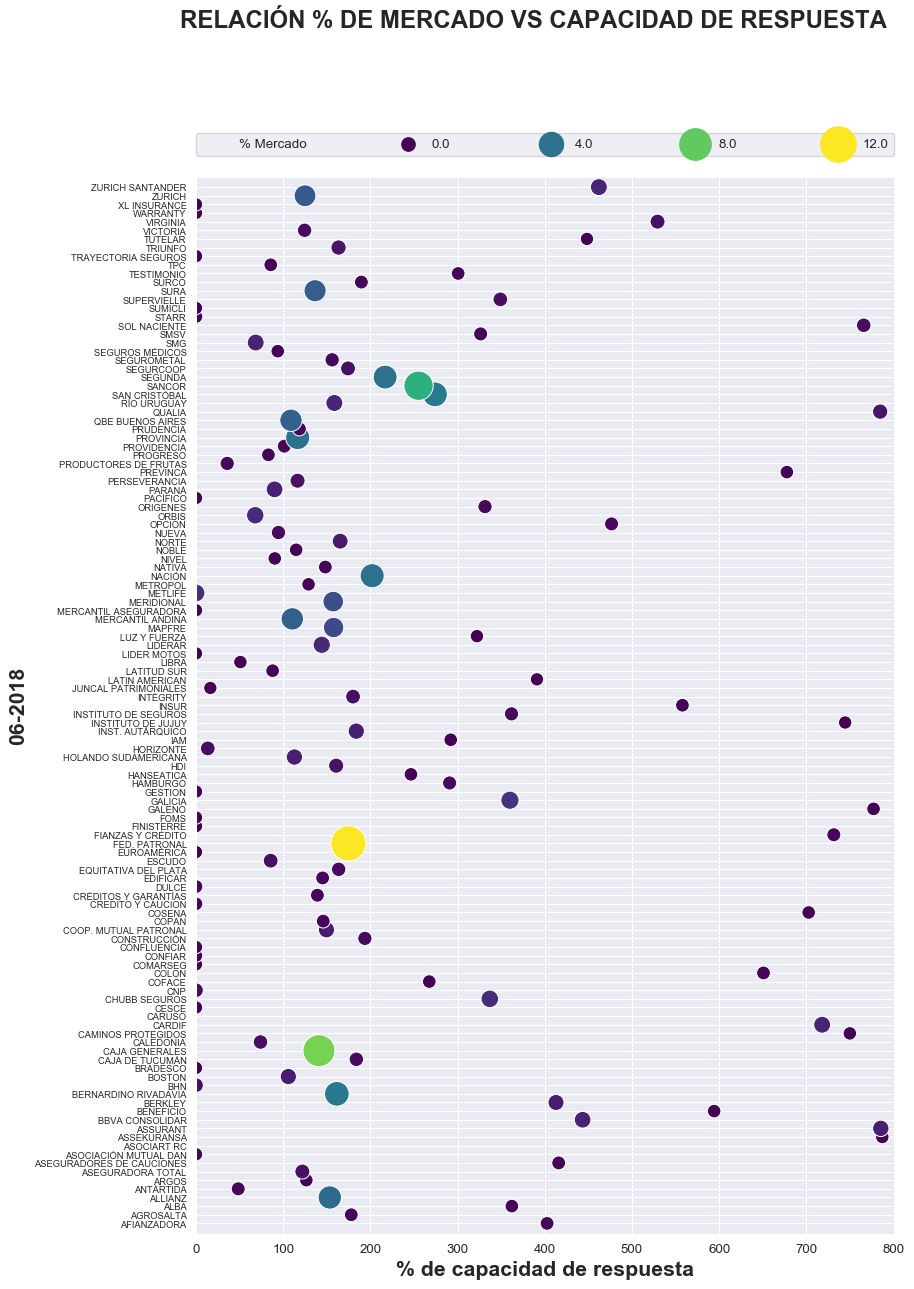

In [66]:
df_PAT = pd.read_csv(enlace_PAT, index_col=0)
df_ART = pd.read_csv(enlace_ART, index_col=0)
df_TRANSPORTE = pd.read_csv(enlace_TRANSPORTE, index_col=0)
df_VIDA = pd.read_csv(enlace_VIDA, index_col=0)
df_RETIRO = pd.read_csv(enlace_RETIRO, index_col=0)

mercVsCapacidad(df_PAT, nombre='PAT')

In [35]:
dlist = df_ART.Fecha.unique()
dlist

array(['06-2018', '03-2018', '12-2017', '09-2017', '06-2017', '03-2017',
       '12-2016', '09-2016', '06-2016', '03-2016', '12-2015', '09-2015',
       '06-2015', '03-2015', '12-2014', '09-2014', '06-2014', '03-2014',
       '12-2013', '09-2013', '06-2013', '03-2013', '12-2012', '09-2012',
       '06-2012', '03-2012'], dtype=object)

In [46]:
for d in range(len(dlist)):
    print(len(df_ART[df_ART['Fecha'] == dlist[d]]))

13
13
13
13
13
13
12
12
12
14
14
14
14
14
14
14
14
14
15
15
16
15
15
15
15
15
